In [2]:
from lean_euler import LeanEuler
import networkx as nx
from euler_input_visualization_nxpd import visualize_euler_input
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
import sys
sys.path.append('/Users/sahil1105/PW-explorer/src')
from load_worlds import load_worlds
from run_clingo import run_clingo
from Custom_Visualization_Functions import euler_visualization_nxpd
import pandas as pd
import numpy as np

In [3]:
# fname = 'Preprocessed_CleanTax_Input/abstract4_mnpw.txt'
# fname = 'Preprocessed_CleanTax_Input/auto_example.txt'
# fname = 'Preprocessed_CleanTax_Input/cen_ndc_1pw.txt'
# fname = 'Preprocessed_CleanTax_Input/beer_tax.txt'

In [4]:
# cleantax_file = open(fname, 'r').read().split('\n')
# cleantax_file

In [5]:
cleantax_file = ['taxonomy T1 Source',
 '(Automobile Sedan Wagon SUV)',
 '(Sedan Sedan_Audi Sedan_BMW)',
 '(Wagon Wagon_Audi Wagon_BMW)',
 'taxonomy T2 Target',
 '(Automobile Audi BMW)',
 '(Audi Sedan_Audi Wagon_Audi SUV_Audi)',
 '(BMW Sedan_BMW SUV_BMW)',
 'articulations T1 T2',
 '[T1.Automobile equals T2.Automobile]',
 '[T1.Sedan_BMW equals T2.Sedan_BMW]',
 '[T1.Wagon_Audi equals T2.Wagon_Audi]',
 '[T1.Wagon_BMW is_included_in T2.BMW]',
 '[T2.SUV_Audi is_included_in T1.SUV]',
 '']

In [6]:
rel_data, tax_data = LeanEuler.parse_cleantax(cleantax_file)

In [7]:
rel_data

,Node1,Relation,Node2
0,"""T1_Automobile""",parent,"""T1_Sedan"""
1,"""T1_Automobile""",parent,"""T1_Wagon"""
2,"""T1_Automobile""",parent,"""T1_SUV"""
3,"""T1_Sedan""",parent,"""T1_Sedan_Audi"""
4,"""T1_Sedan""",parent,"""T1_Sedan_BMW"""
5,"""T1_Wagon""",parent,"""T1_Wagon_Audi"""
6,"""T1_Wagon""",parent,"""T1_Wagon_BMW"""
7,"""T2_Automobile""",parent,"""T2_Audi"""
8,"""T2_Automobile""",parent,"""T2_BMW"""
9,"""T2_Audi""",parent,"""T2_Sedan_Audi"""


In [8]:
# rel_data.append(('"T2_SUV_Audi"', '<', '"T1_SUV"'))

In [9]:
tax_data

{'T1': {'Automobile': Node('/T1/"T1_Automobile"'),
  'SUV': Node('/T1/"T1_Automobile"/"T1_SUV"'),
  'Sedan': Node('/T1/"T1_Automobile"/"T1_Sedan"'),
  'Sedan_Audi': Node('/T1/"T1_Automobile"/"T1_Sedan"/"T1_Sedan_Audi"'),
  'Sedan_BMW': Node('/T1/"T1_Automobile"/"T1_Sedan"/"T1_Sedan_BMW"'),
  'T1': Node('/T1'),
  'Wagon': Node('/T1/"T1_Automobile"/"T1_Wagon"'),
  'Wagon_Audi': Node('/T1/"T1_Automobile"/"T1_Wagon"/"T1_Wagon_Audi"'),
  'Wagon_BMW': Node('/T1/"T1_Automobile"/"T1_Wagon"/"T1_Wagon_BMW"')},
 'T2': {'Audi': Node('/T2/"T2_Automobile"/"T2_Audi"'),
  'Automobile': Node('/T2/"T2_Automobile"'),
  'BMW': Node('/T2/"T2_Automobile"/"T2_BMW"'),
  'SUV_Audi': Node('/T2/"T2_Automobile"/"T2_Audi"/"T2_SUV_Audi"'),
  'SUV_BMW': Node('/T2/"T2_Automobile"/"T2_BMW"/"T2_SUV_BMW"'),
  'Sedan_Audi': Node('/T2/"T2_Automobile"/"T2_Audi"/"T2_Sedan_Audi"'),
  'Sedan_BMW': Node('/T2/"T2_Automobile"/"T2_BMW"/"T2_Sedan_BMW"'),
  'T2': Node('/T2'),
  'Wagon_Audi': Node('/T2/"T2_Automobile"/"T2_Audi"/"T2_

In [10]:
rules = LeanEuler.gen_asp_rules(rel_data, tax_data, encoding='mnpw')

In [11]:
print('\n'.join(rules))

r(1..35).

% Region Meanings
in(X, M) :- r(M), concept(X, T, N), N1=N+1, bit(M, T, N1).
out(X, M) :- r(M), concept(X, T, N), N1=N+1, not bit(M, T, N1).
in(X, M) :- r(M), concept2(X, _), not out(X, M).
irs(M) :- in(X, M), out(X, M), r(M), concept2(X, _).

% Region Constraints
irs(X) :- ir(X, _).
vrs(X) :- vr(X, _).
vr(X, X) :- not irs(X), r(X).
ir(X, X) :- not vrs(X), r(X).
:- vrs(X), irs(X).

concept2(A, B) :- concept(A,B,_).

% Taxonomy Description

%  Euler Bit
bit(M, 0, V) :- r(M), M1=M/1, V = M1 \ 6.

%  Euler Bit
bit(M, 1, V) :- r(M), M1=M/6, V = M1 \ 6.

concept2("T1_Automobile", 0).
concept2("T1_Sedan", 0).
concept("T1_Sedan_Audi", 0, 0).
concept("T1_Sedan_BMW", 0, 1).
concept2("T1_Wagon", 0).
concept("T1_Wagon_Audi", 0, 2).
concept("T1_Wagon_BMW", 0, 3).
concept("T1_SUV", 0, 4).
concept2("T2_Automobile", 1).
concept2("T2_Audi", 1).
concept("T2_Sedan_Audi", 1, 0).
concept("T2_Wagon_Audi", 1, 1).
concept("T2_SUV_Audi", 1, 2).
concept2("T2_BMW", 1).
concept("T2_Sedan_BMW", 1, 3).


In [12]:
# Alternatively, short-cut
# rules = LeanEuler.gen_asp_rules_from_cleantax(cleantax_file, encoding='mnpw')
# print('\n'.join(rules))

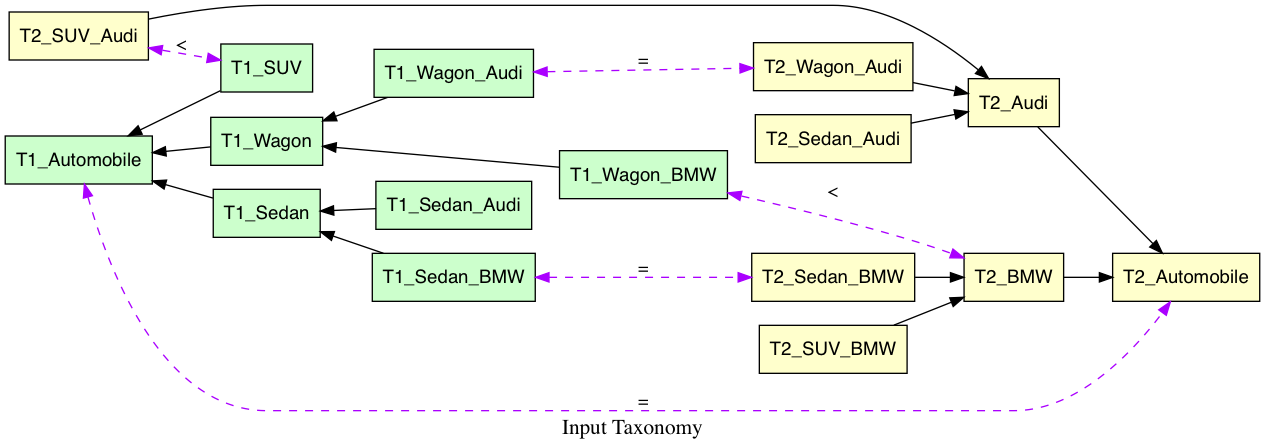

In [13]:
G = visualize_euler_input(rel_data, tax_data)
draw(G)

In [14]:
clingo_soln = run_clingo(clingo_rules=rules)
print('\n'.join(clingo_soln))

Answer: 1
u("T1_Sedan") u("T1_Wagon") u("T1_SUV") u("T1_Sedan_Audi") u("T1_Sedan_BMW") u("T1_Wagon_Audi") u("T1_Wagon_BMW") u("T2_Audi") u("T2_BMW") u("T2_Sedan_Audi") u("T2_Wagon_Audi") u("T2_SUV_Audi") u("T2_Sedan_BMW") u("T2_SUV_BMW") u("T1_Automobile") u("T2_Automobile") bl("T1_Automobile","T1_Sedan") bl("T1_Automobile","T1_Wagon") bl("T1_Automobile","T1_SUV") bl("T1_Sedan","T1_Sedan_Audi") bl("T1_Sedan","T1_Sedan_BMW") bl("T1_Wagon","T1_Wagon_Audi") bl("T1_Wagon","T1_Wagon_BMW") bl("T2_Automobile","T2_Audi") bl("T2_Automobile","T2_BMW") bl("T2_Audi","T2_Sedan_Audi") bl("T2_Audi","T2_Wagon_Audi") bl("T2_Audi","T2_SUV_Audi") bl("T2_BMW","T2_Sedan_BMW") bl("T2_BMW","T2_SUV_BMW") pp("T1_Sedan","T1_Automobile") pp("T1_Wagon","T1_Automobile") pp("T1_SUV","T1_Automobile") pp("T1_Sedan_Audi","T1_Sedan") pp("T1_Sedan_BMW","T1_Sedan") pp("T1_Wagon_Audi","T1_Wagon") pp("T1_Wagon_BMW","T1_Wagon") pp("T2_Audi","T2_Automobile") pp("T2_BMW","T2_Automobile") pp("T2_Sedan_Audi","T2_Audi") pp("T2_W

In [15]:
dfs, rels, pws = load_worlds(clingo_output=clingo_soln, preprocessed=False, reasoner='clingo')

Number of Models: 8


In [16]:
list(map(lambda x: x.__dict__, rels))

[{'arity': 1, 'r_id': 0, 'relation_name': 'u_1'},
 {'arity': 2, 'r_id': 1, 'relation_name': 'bl_2'},
 {'arity': 2, 'r_id': 2, 'relation_name': 'pp_2'},
 {'arity': 3, 'r_id': 3, 'relation_name': 'rel_3'},
 {'arity': 2, 'r_id': 4, 'relation_name': 'eq_2'},
 {'arity': 2, 'r_id': 5, 'relation_name': 'po_2'},
 {'arity': 2, 'r_id': 6, 'relation_name': 'dr_2'}]

In [17]:
# list(map(lambda x: x.__dict__, pws))

In [18]:
pws_vizs = euler_visualization_nxpd.visualize(dfs=dfs, pws=pws, relations=rels, conn=None, project_name='abstract4', save_to_file=False)

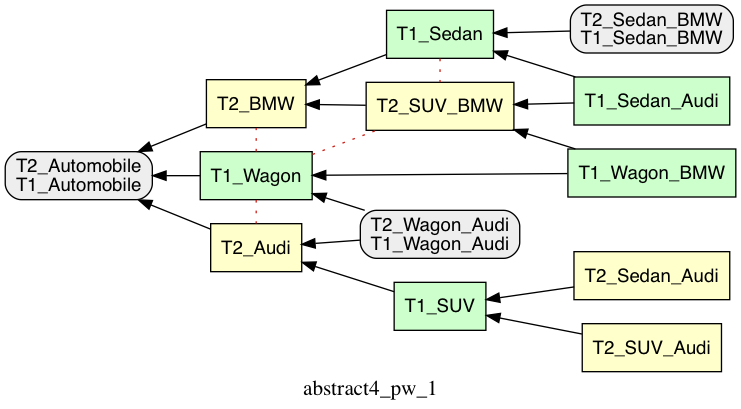

In [19]:
draw(pws_vizs[0])

In [20]:
import pd_query

In [21]:
pd_query.difference_both_ways_panda(col_names=['x1', 'x2'], 
                                    dfs=dfs, do_print=False, 
                                    pw_id_1=4, pw_id_2=5, 
                                    relations=rels, rl_id=5)

,x1,x2
0,"""T1_Wagon""","""T2_SUV_BMW"""
1,"""T1_SUV""","""T2_Audi"""
2,"""T1_SUV""","""T2_BMW"""
3,"""T1_SUV""","""T2_SUV_BMW"""


In [22]:
unique_tuples = pd_query.unique_tuples_panda(relations=rels, col_names=['x1','x2','x3'], dfs=dfs, do_print=True, expected_pws=len(pws), rl_id=3)

The unique tuple  ('"T1_Sedan_Audi"', '"T2_Sedan_Audi"', '"="') occurs only in PW 3
The unique tuple  ('"T1_Wagon"', '"T2_SUV_BMW"', '">"') occurs only in PW 4
The unique tuple  ('"T1_Wagon_BMW"', '"T2_SUV_BMW"', '"="') occurs only in PW 4
The unique tuple  ('"T1_Sedan_Audi"', '"T2_Sedan_Audi"', '">"') occurs only in PW 6


In [23]:
unique_tuples[3]

(x1    "T1_Sedan_Audi"
 x2    "T2_Sedan_Audi"
 x3                ">"
 Name: 81, dtype: object, 6)

In [24]:
pd_query.freq_panda(col_names=['x1', 'x2'], dfs=dfs, do_print=True, expected_pws=len(pws), relations=rels, rl_id=2, values=['"T1_SUV"', '"T2_Audi"'])

Frequency of tuple ('"T1_SUV"', '"T2_Audi"') of the relation pp_2 for attributes x1, x2 in PWs 1, 2, 3, 4, 5, 6, 7, 8 is: 3


(         x1         x2
 0  "T1_SUV"  "T2_Audi", [3])

In [28]:
overlaps_df = dfs[5]
num_overlaps_by_pw = np.array([(i, len(overlaps_df[overlaps_df['pw'] == i])) for i in range(1, len(pws)+1)])
num_overlaps_by_pw

array([[ 1,  4],
       [ 2,  7],
       [ 3,  8],
       [ 4,  6],
       [ 5, 10],
       [ 6, 12],
       [ 7, 12],
       [ 8, 15]])

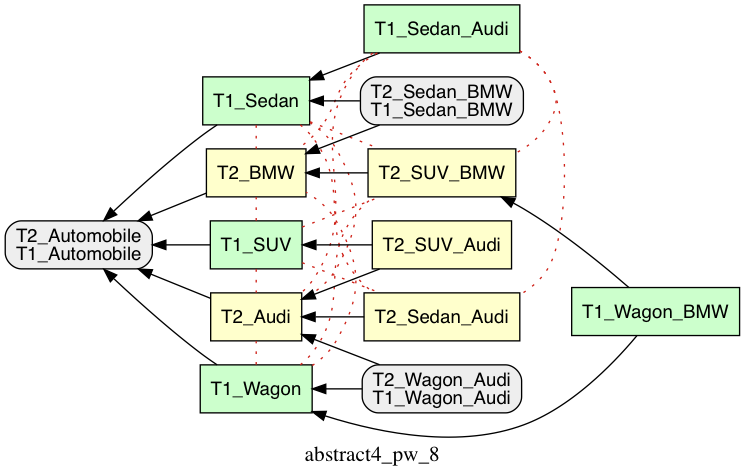

In [31]:
draw(pws_vizs[np.argmax(num_overlaps_by_pw[:, 1])])

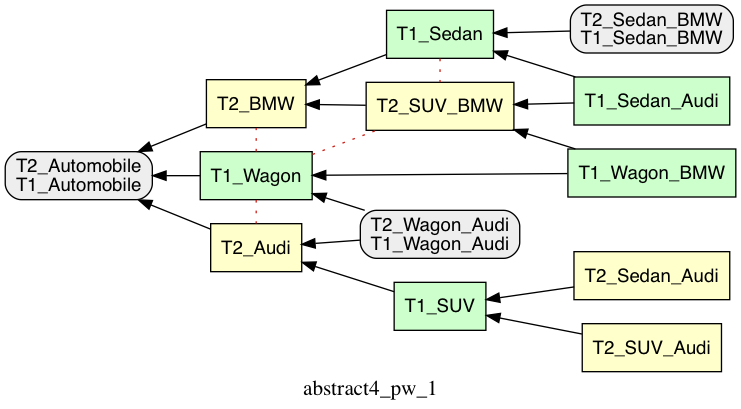

In [32]:
draw(pws_vizs[np.argmin(num_overlaps_by_pw[:, 1])])